In [1]:
import corner
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import json
import lmfit

In [2]:
with open('flux for2.txt') as fr:
	fl1 = json.load(fr)
with open('flux for8.txt') as fr:
	fl2 = json.load(fr)
with open('time.txt') as fr:
	time = json.load(fr)
with open('position of core for2.txt') as fr:
	position1 = json.load(fr)
with open('position of core for8.txt') as fr:
	position2 = json.load(fr)

In [3]:
crsh = np.array(position1) - np.array(position2)

inaccuracy_crshf=crsh*0.1

fl1=np.array(fl1)
fl2=np.array(fl2)

In [4]:
flux = np.array([fl1, fl2])
position1=np.array(position1)

In [5]:
def func(flux,a, b1, k, b2):
	return (a+b1*(flux[0]**k) - b2*(flux[1]**k))

In [6]:
#p0 = (0, 0.1, 0.23,0.1)

popt, pcov = curve_fit(func, flux, crsh,maxfev=10000,sigma=inaccuracy_crshf, bounds =([0., 0.9, 0.2, 0.9 ],[0.2, 1.5, 0.26,  1.5 ]))

perr = np.sqrt(np.diag(pcov))
print( popt)
print(pcov)
print("deviation", perr)

[0.2        1.09166533 0.2        0.9       ]
[[ 0.83356862 -5.53782417  1.13529941 -4.72676188]
 [-5.53782417 42.56606248 -8.8672758  37.32158592]
 [ 1.13529941 -8.8672758   1.85321228 -7.79814622]
 [-4.72676188 37.32158592 -7.79814622 32.87242882]]
deviation [0.91299979 6.5242672  1.3613274  5.73344825]


In [7]:
ans = popt[0] + popt[1]*pow(flux[0],popt[2]) - popt[3]*pow(flux[1],popt[2])

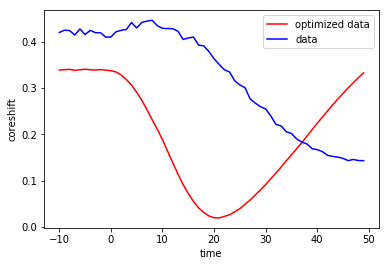

In [8]:
plt.plot (time, ans, color = 'red', label = "optimized data")
plt.plot (time, crsh, color = 'blue', label = "data")


plt.legend ()


plt.xlabel('time')
plt.ylabel('coreshift')
plt.show()

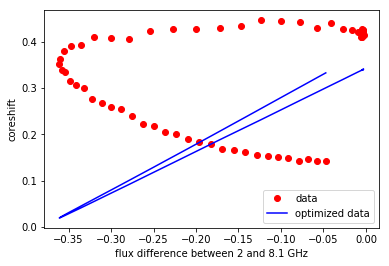

In [9]:
plt.plot (flux[0]**popt[2]-flux[1]**popt[2], crsh, 'o', color = 'red', label = "data")

plt.plot (flux[0]**popt[2]-flux[1]**popt[2], ans, '-', color = 'blue', label = "optimized data")
plt.legend ()

plt.xlabel('flux difference between 2 and 8.1 GHz')
plt.ylabel('coreshift')
plt.show()

In [10]:
def func(x, a, b1, k,):
    return a+b1*(x**k)
x = fl2.copy()
y = np.array(position2)

model = lmfit.Model(func)

In [11]:
p = model.make_params(a=0, b1=1, k=0.28)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2027
    # data points      = 60
    # variables        = 3
    chi-square         = 0.02364499
    reduced chi-square = 4.1482e-04
    Akaike info crit   = -464.336920
    Bayesian info crit = -458.053887
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a:  -1171.54232 +/-        nan (nan%) (init = 0)
    b1:  1172.01243 +/-        nan (nan%) (init = 1)
    k:   1.8652e-04 +/-        nan (nan%) (init = 0.28)


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

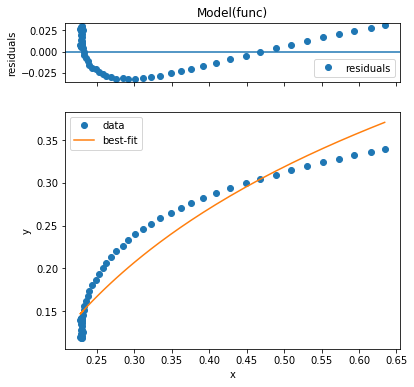

In [12]:
result = model.fit(data=y,x=fl1, params=p)
lmfit.report_fit(result)
result.plot()

In [13]:
fl2_2 = []
for i in range(len(fl1)):
    if fl1[i] != max(fl1):
         fl2_2.append(fl1[i])
    else:
        break

In [16]:
fl2_2 =  np.array(fl2_2)
y1  = y[0:fl2_2.shape[0]]
x = fl2_2.copy()
model = lmfit.Model(func)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2115
    # data points      = 59
    # variables        = 3
    chi-square         = 0.02256944
    reduced chi-square = 4.0303e-04
    Akaike info crit   = -458.253064
    Bayesian info crit = -452.020452
[[Variables]]
    a:  -1187.01930 +/- 422405.385 (35585.38%) (init = 0)
    b1:  1187.49533 +/- 422405.376 (35571.12%) (init = 1)
    k:   1.8774e-04 +/- 0.06674726 (35552.61%) (init = 0.28)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b1) = -1.000
    C(a, k)  =  1.000
    C(b1, k) = -1.000


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

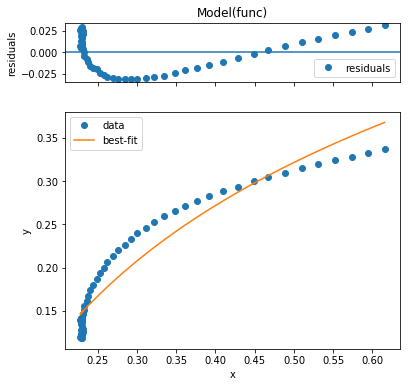

In [17]:
p = model.make_params(a=0, b1=1, k=0.28)
result = model.fit(data=y1,x=fl2_2, params=p)
lmfit.report_fit(result)
result.plot()